In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Patch
import webcolors
qq = pd.read_csv('./output/31_hr48_ocr_gridmask.csv')
qq2 = pd.read_csv('./output/31_hr48_ocr_gridmask_tta2.csv')
qq

,image_id,PredictionString
0,batch_01_vt/0021.jpg,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1,batch_01_vt/0028.jpg,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
2,batch_01_vt/0031.jpg,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
3,batch_01_vt/0032.jpg,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
4,batch_01_vt/0076.jpg,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
...,...,...
619,batch_02_vt/1949.jpg,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
620,batch_02_vt/1960.jpg,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
621,batch_02_vt/1974.jpg,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
622,batch_02_vt/1990.jpg,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...


In [65]:
class_colormap = pd.read_csv("class_dict.csv")

def create_trash_label_colormap():
    """Creates a label colormap used in Trash segmentation.
    Returns:
        A colormap for visualizing segmentation results.
    """
    colormap = np.zeros((11, 3), dtype=np.uint8)
    for inex, (_, r, g, b) in enumerate(class_colormap.values):
        colormap[inex] = [r, g, b]
    
    return colormap

def label_to_color_image(label):
    """Adds color defined by the dataset colormap to the label.

    Args:
        label: A 2D array with integer type, storing the segmentation label.

    Returns:
        result: A 2D array with floating type. The element of the array
                is the color indexed by the corresponding element in the input label
                to the trash color map.

    Raises:
        ValueError: If label is not of rank 2 or its value is larger than color
              map maximum entry.
    """
    if label.ndim != 2:
        raise ValueError('Expect 2-D input label')

    colormap = create_trash_label_colormap()

    if np.max(label) >= len(colormap):
        raise ValueError('label value too large.')

    return colormap[label]

category_and_rgb = [[category, (r,g,b)] for idx, (category, r, g, b) in enumerate(class_colormap.values)]
legend_elements = [Patch(facecolor=webcolors.rgb_to_hex(rgb), 
                         edgecolor=webcolors.rgb_to_hex(rgb), 
                         label=category) for category, rgb in category_and_rgb]

In [73]:
b = qq[qq['image_id'] == 'batch_01_vt/0131.jpg']['PredictionString']

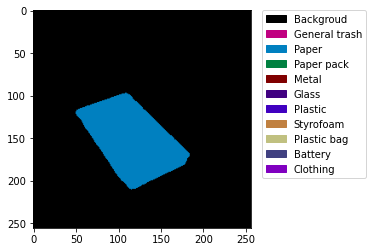

In [74]:
c = list(map(int,b.to_list()[0].split()))
data = np.array(c, ).reshape(256, 256)
# image = np.random.rand(30, 30)
plt.imshow(label_to_color_image(data))    
# plt.imshow(data , cmap=plt.cm.hsv)   
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

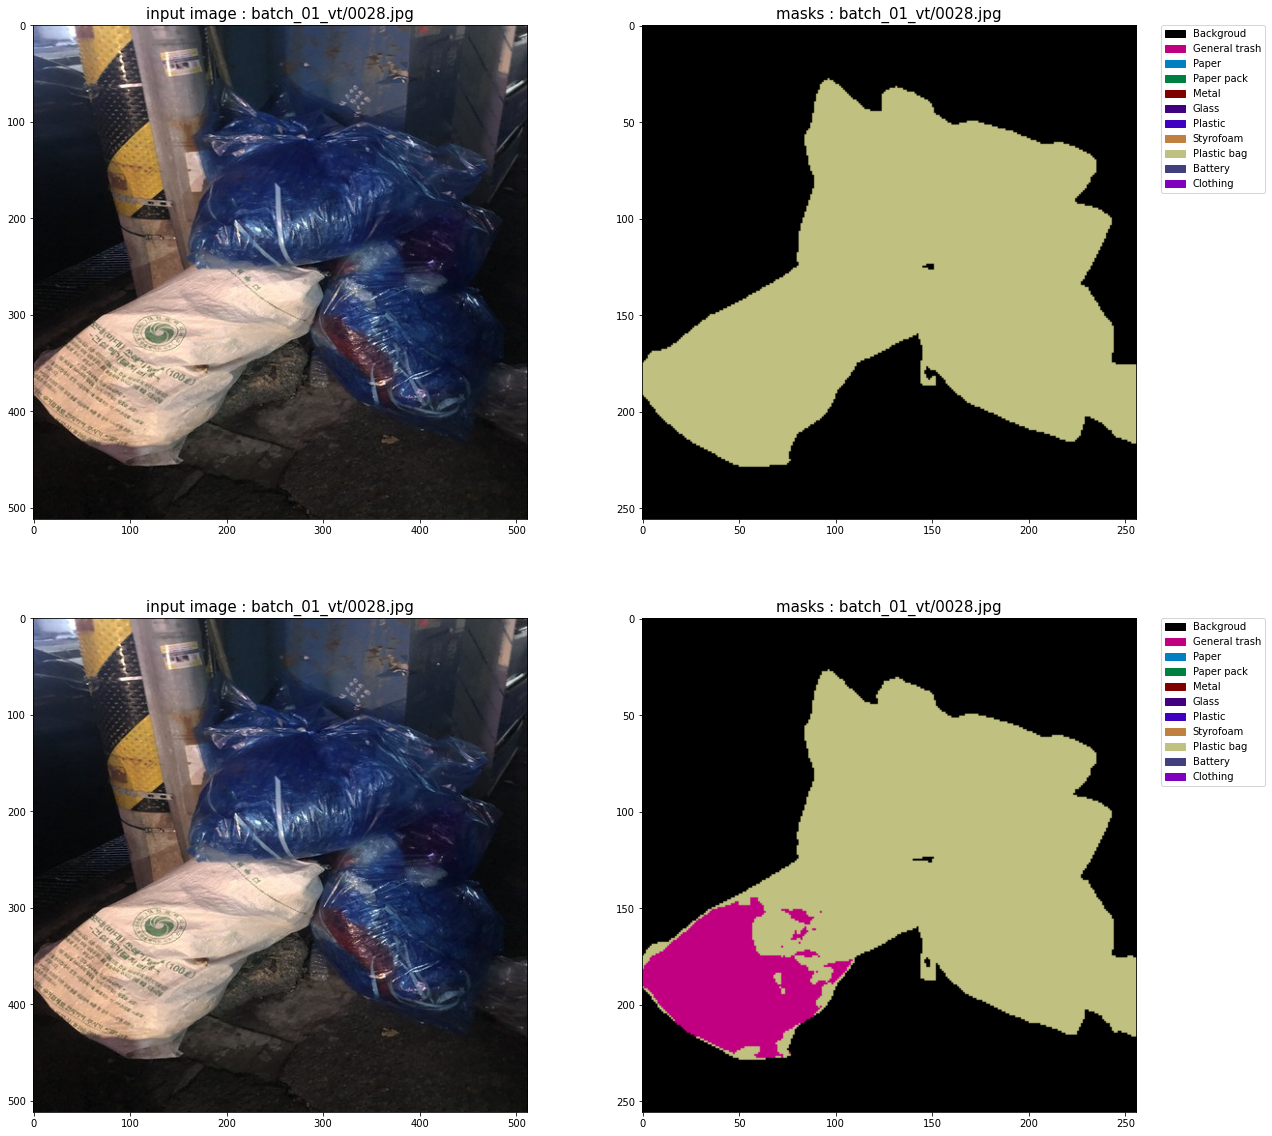

In [71]:

id = 1
img = '../input/data/'+qq['image_id'][id]
img = Image.open(img)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

ax[0][0].imshow(img)
ax[0][0].grid(False)
ax[0][0].set_title("input image : {}".format(qq['image_id'][id]), fontsize = 15)


b = qq['PredictionString'][id]
c = list(map(int,b.split()))
data = np.array(c, ).reshape(256, 256)

ax[0][1].imshow(label_to_color_image(data))
ax[0][1].grid(False)
ax[0][1].set_title("masks : {}".format(qq['image_id'][id]), fontsize = 15)
ax[0][1].legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

ax[1][0].imshow(img)
ax[1][0].grid(False)
ax[1][0].set_title("input image : {}".format(qq['image_id'][id]), fontsize = 15)


b = qq2['PredictionString'][id]
c = list(map(int,b.split()))
data = np.array(c, ).reshape(256, 256)

ax[1][1].imshow(label_to_color_image(data))
ax[1][1].grid(False)
ax[1][1].set_title("masks : {}".format(qq['image_id'][id]), fontsize = 15)
ax[1][1].legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
# ax2.colorbar()
plt.show()